In [1]:
import torch
import torch.nn.functional as F
from torch.utils.tensorboard import SummaryWriter

import torchattacks

from utils import experiment, iterate
from mnist_models import CNN

m = CNN()
writer = SummaryWriter()

for epoch in range(10):
    m = iterate.train(m,
        iterate.mnist_rand_step,
        device = 'cuda',
        train_set = experiment.train_set,
        batch_size = 1000,
        optimizer = torch.optim.Adam(m.parameters(), lr = 0.001),
        epoch = epoch,
        writer = writer
    )

    # iterate.validate(m,
    #     iterate.mnist_augmented_step,
    #     device = 'cuda',
    #     val_set = experiment.val_set,
    #     batch_size = 1000,
    #     epoch = epoch,
    #     writer = writer
    # )

    # iterate.attack(m,
    #     iterate.mnist_step,
    #     iterate.mnist_attacked_step,
    #     device = 'cuda',
    #     val_set = experiment.val_set,
    #     batch_size = 1000,
    #     epoch = epoch,
    #     writer = writer,
    #     torchattack=torchattacks.PGD,
    #     eps=0.1,
    #     alpha=1/255,
    #     steps=40,
    #     random_start=False
    # )

    # iterate.attack(m,
    #     iterate.mnist_step,
    #     iterate.mnist_attacked_step,
    #     device = 'cuda',
    #     val_set = experiment.val_set,
    #     batch_size = 1000,
    #     epoch = epoch,
    #     writer = writer,
    #     torchattack=torchattacks.PGDL2,
    #     eps=0.5,
    #     alpha=0.2,
    #     steps=40,
    #     random_start=True
    # )
# torch.save(m.state_dict(), "mnist_cnn.pt")
print(m)
writer.flush()
writer.close()



CNN(
  (conv): Sequential(
    (0): Sequential(
      (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
      (1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (1): Sequential(
      (0): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
      (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
  )
  (fc): Sequential(
    (0): Sequential(
      (0): Linear(in_features=256, out_features=120, bias=True)
      (1): BatchNorm1d(120, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Linear(in_features=120, out_features=84, bias=True)
      (1): BatchNorm1d(84, eps=1e-05, momentum=0.1, affine=True, t

In [2]:
outputs = iterate.predict(m,
        iterate.mnist_delta_predict_step_linf,
        device = 'cuda',
        val_set = experiment.val_set,
        batch_size = 1000
)
print(outputs.keys(), outputs['predictions'])


dict_keys(['predictions', 'correct', 'samples']) tensor([1., 1., 1.,  ..., 1., 1., 1.], device='cuda:0')


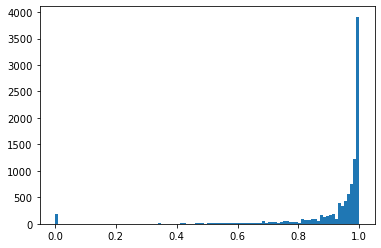

In [3]:
import matplotlib.pyplot as plt

plt.hist(outputs['correct'].tolist(), bins = 100)
plt.show()

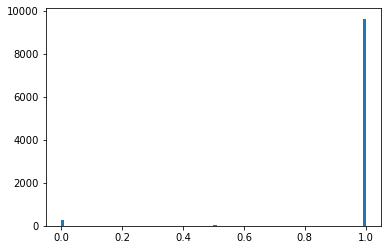

In [4]:
plt.hist(outputs['predictions'].tolist(), bins = 100)
plt.show()

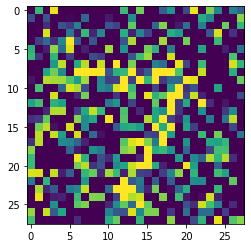

In [5]:
plt.imshow(outputs['samples'][0].squeeze().cpu())


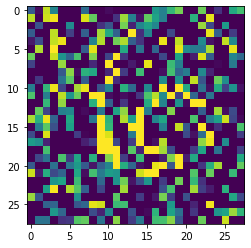

In [6]:
plt.imshow(outputs['samples'][100].squeeze().cpu())


In [10]:
torch.cdist(outputs['samples'][0].flatten().unsqueeze(0), outputs['samples'][1].flatten().unsqueeze(0))

tensor([[14.8443]], device='cuda:0')